In [1]:
import nltk
import pandas as pd
import re
import tensorflow as tf
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [2]:
data = pd.read_csv('/content/judge-1377884607_tweet_product_company.csv',encoding = 'ISO-8859-1')

In [3]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
data.shape

(9093, 3)

In [5]:
data.rename(columns={'emotion_in_tweet_is_directed_at':'emotion_towards','is_there_an_emotion_directed_at_a_brand_or_product':'emotion_reaction'},inplace=True)


In [6]:
data.head()

,tweet_text,emotion_towards,emotion_reaction
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
data=data.drop('emotion_towards',axis=1)

In [8]:
data.head()

,tweet_text,emotion_reaction
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [9]:
data.tail()

,tweet_text,emotion_reaction
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,No emotion toward brand or product


In [10]:

data['tweet_text'] = data['tweet_text'].astype(str).apply(lambda x: x.lower()) # To lower
data['tweet_text'] = data['tweet_text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [11]:
data = data.drop(data[data.emotion_reaction == "negative"].iloc[:9000].index)

In [12]:
max_fatures = 9000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(data['tweet_text'].values)
X = tokenizer.texts_to_sequences(data['tweet_text'].values)
X = pad_sequences(X)
Y = data['emotion_reaction']
L = Y.values
X
L

array(['Negative emotion', 'Positive emotion', 'Positive emotion', ...,
       'No emotion toward brand or product',
       'No emotion toward brand or product',
       'No emotion toward brand or product'], dtype=object)

In [13]:
k = []
for i in range(3704):
    if L[i]=="negative":
                        k.append(0)
    elif L[i]=="positive":
                        k.append(1)
    elif L[i]=="neutral":
                        k.append(2)
    elif L[i]=="No emotion toward brand or product'":
                        k.append(3)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, np.ones(len(X)),
                                                    test_size=0.3,
                                                    shuffle = True,
                                                    stratify = np.ones(len(X)),
                                                    random_state = 1 )

In [16]:
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
model.compile(optimizer="adam", loss="sparse_categorical_crosseropy", metrics=["accuracy"])

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
Model = model.fit(X_train,
                         Y_train,
                         epochs=20,
                         batch_size=32,
                         validation_split = 0.2,
                         verbose = 2)

Epoch 1/20
160/160 - 53s - loss: 0.0298 - accuracy: 0.9949 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 53s/epoch - 332ms/step
Epoch 2/20
160/160 - 33s - loss: 6.5082e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 33s/epoch - 205ms/step
Epoch 3/20
160/160 - 45s - loss: 1.2408e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 45s/epoch - 281ms/step
Epoch 4/20
160/160 - 39s - loss: 1.1003e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 39s/epoch - 244ms/step
Epoch 5/20
160/160 - 38s - loss: 1.4983e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 38s/epoch - 239ms/step
Epoch 6/20
160/160 - 35s - loss: 1.2244e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 35s/epoch - 219ms/step
Epoch 7/20
160/160 - 34s - loss: 2.4582e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 34s/epoch - 211ms/step
Epoch 8/20
160/160 - 34s - loss: 1.4515e-09 - accuracy: 1.0000 - v

In [23]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])


loss =  0.0
accuracy =  1.0


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

86/86 [==============================] - 4s 42ms/step


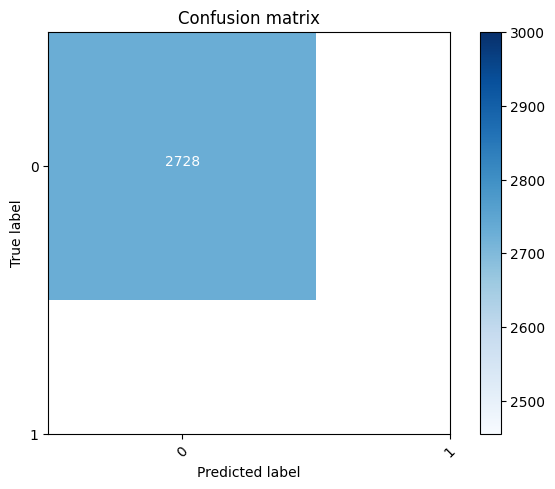

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
confusion_mtx = confusion_matrix(Y_test, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [26]:
sample = ['Ipad everywhere']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
elif (np.argmax(sentiment) == 2):
    print("neutral")
elif (np.argmax(sentiment) == 3):
    print("No emotion toward brand or product")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   9 654]]
1/1 - 0s - 53ms/epoch - 53ms/step
positive
